# **MNIST**

In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((x_test.shape[0], 28*28))
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [0]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(784, )))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, nb_epoch=10, verbose=1, validation_data = (x_test, y_test))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 4s 68us/step - loss: 0.0467 - acc: 0.9843 - val_loss: 0.0265 - val_acc: 0.9911
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0206 - acc: 0.9931 - val_loss: 0.0222 - val_acc: 0.9924
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0144 - acc: 0.9952 - val_loss: 0.0176 - val_acc: 0.9940
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0111 - acc: 0.9964 - val_loss: 0.0162 - val_acc: 0.9946
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0087 - acc: 0.9971 - val_loss: 0.0147 - val_acc: 0.9951
Epoch 6/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0073 - acc: 0.9976 - val_loss: 0.0159 - val_acc: 0.9950
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0156 - 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


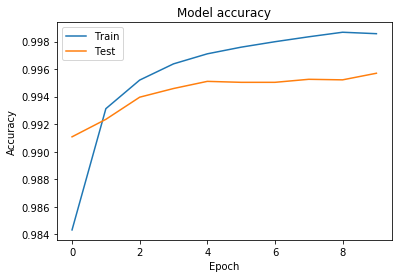

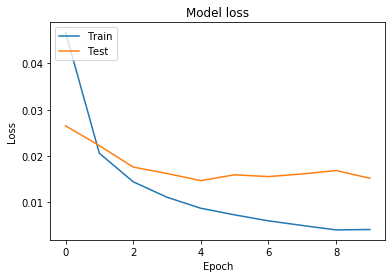

In [0]:
#epoch vs acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#epoch vs loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **IRIS**

In [0]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [0]:
iris = load_iris()
x = iris.data
y_ = iris.target.reshape(-1,1)

In [0]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01)

In [0]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(4, )))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, nb_epoch=10, verbose=1, validation_data = (x_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 148 samples, validate on 2 samples
Epoch 1/10
148/148 [==============================] - 0s 2ms/step - loss: 0.6579 - acc: 0.6667 - val_loss: 0.7023 - val_acc: 0.6667
Epoch 2/10
148/148 [==============================] - 0s 58us/step - loss: 0.5922 - acc: 0.7117 - val_loss: 0.6600 - val_acc: 0.6667
Epoch 3/10
148/148 [==============================] - 0s 81us/step - loss: 0.5472 - acc: 0.7230 - val_loss: 0.5540 - val_acc: 0.6667
Epoch 4/10
148/148 [==============================] - 0s 69us/step - loss: 0.5007 - acc: 0.7545 - val_loss: 0.4313 - val_acc: 0.8333
Epoch 5/10
148/148 [==============================] - 0s 80us/step - loss: 0.4619 - acc: 0.8514 - val_loss: 0.3306 - val_acc: 1.0000
Epoch 6/10
148/148 [==============================] - 0s 66us/step - loss: 0.4303 - acc: 0.8761 - val_loss: 0.2608 - val_acc: 1.0000
Epoch 7/10
148/148 [==============================] - 0s 57us/step - loss: 0.3989 - acc: 0.8806 - val_loss: 0.2235 - val_acc: 1.0000
Epoch 8/10
148/148 [======

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 195       
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
_________________________________________________________________


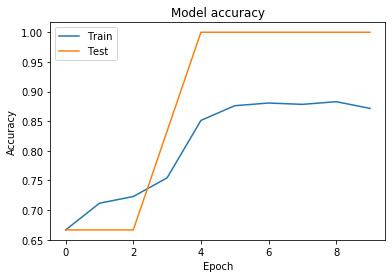

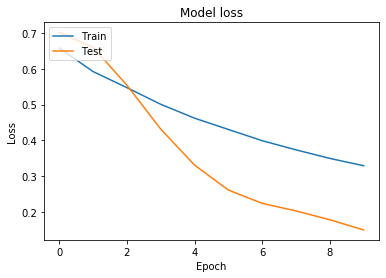

In [0]:
#epoch vs acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#epoch vs loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **FASHION MNIST**

In [0]:
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
x_train.shape 
y_train.shape

(60000,)

In [0]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((x_test.shape[0], 28*28))
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(784, )))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data = (x_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0916 - acc: 0.9635 - val_loss: 0.0758 - val_acc: 0.9697
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0667 - acc: 0.9733 - val_loss: 0.0686 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0607 - acc: 0.9756 - val_loss: 0.0667 - val_acc: 0.9736
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0571 - acc: 0.9770 - val_loss: 0.0651 - val_acc: 0.9742
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0545 - acc: 0.9779 - val_loss: 0.0651 - val_acc: 0.9745
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0518 - acc: 0.9791 - val_loss: 0.0718 - val_acc: 0.9719
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0497 - acc: 0.9800 - val_loss: 0.0597 - val_ac

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
Total params: 130,058
Trainable params: 130,058
Non-trainable params: 0
_________________________________________________________________


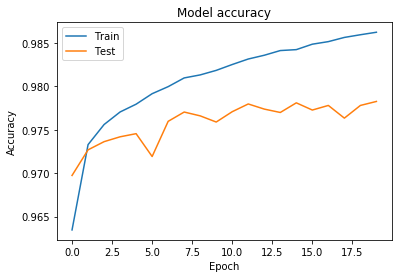

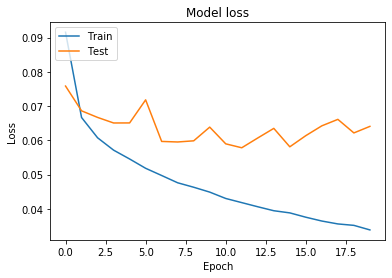

In [0]:
#epoch vs acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#epoch vs loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()